# Oracle 
Design for qiskit version 1.2.0
 
Author: Matías Hernández Serrano
 
Version: 1.0.0

Date: 27-01-2025

Code to check if a solutions satisfies an oracle. In this code we will use our functions to create an 
oracle. We will define a possible solutions and check if it satisfies the oracle.


In [2]:
from gatesUPCT import *

First we have to create a topology for the algorithm

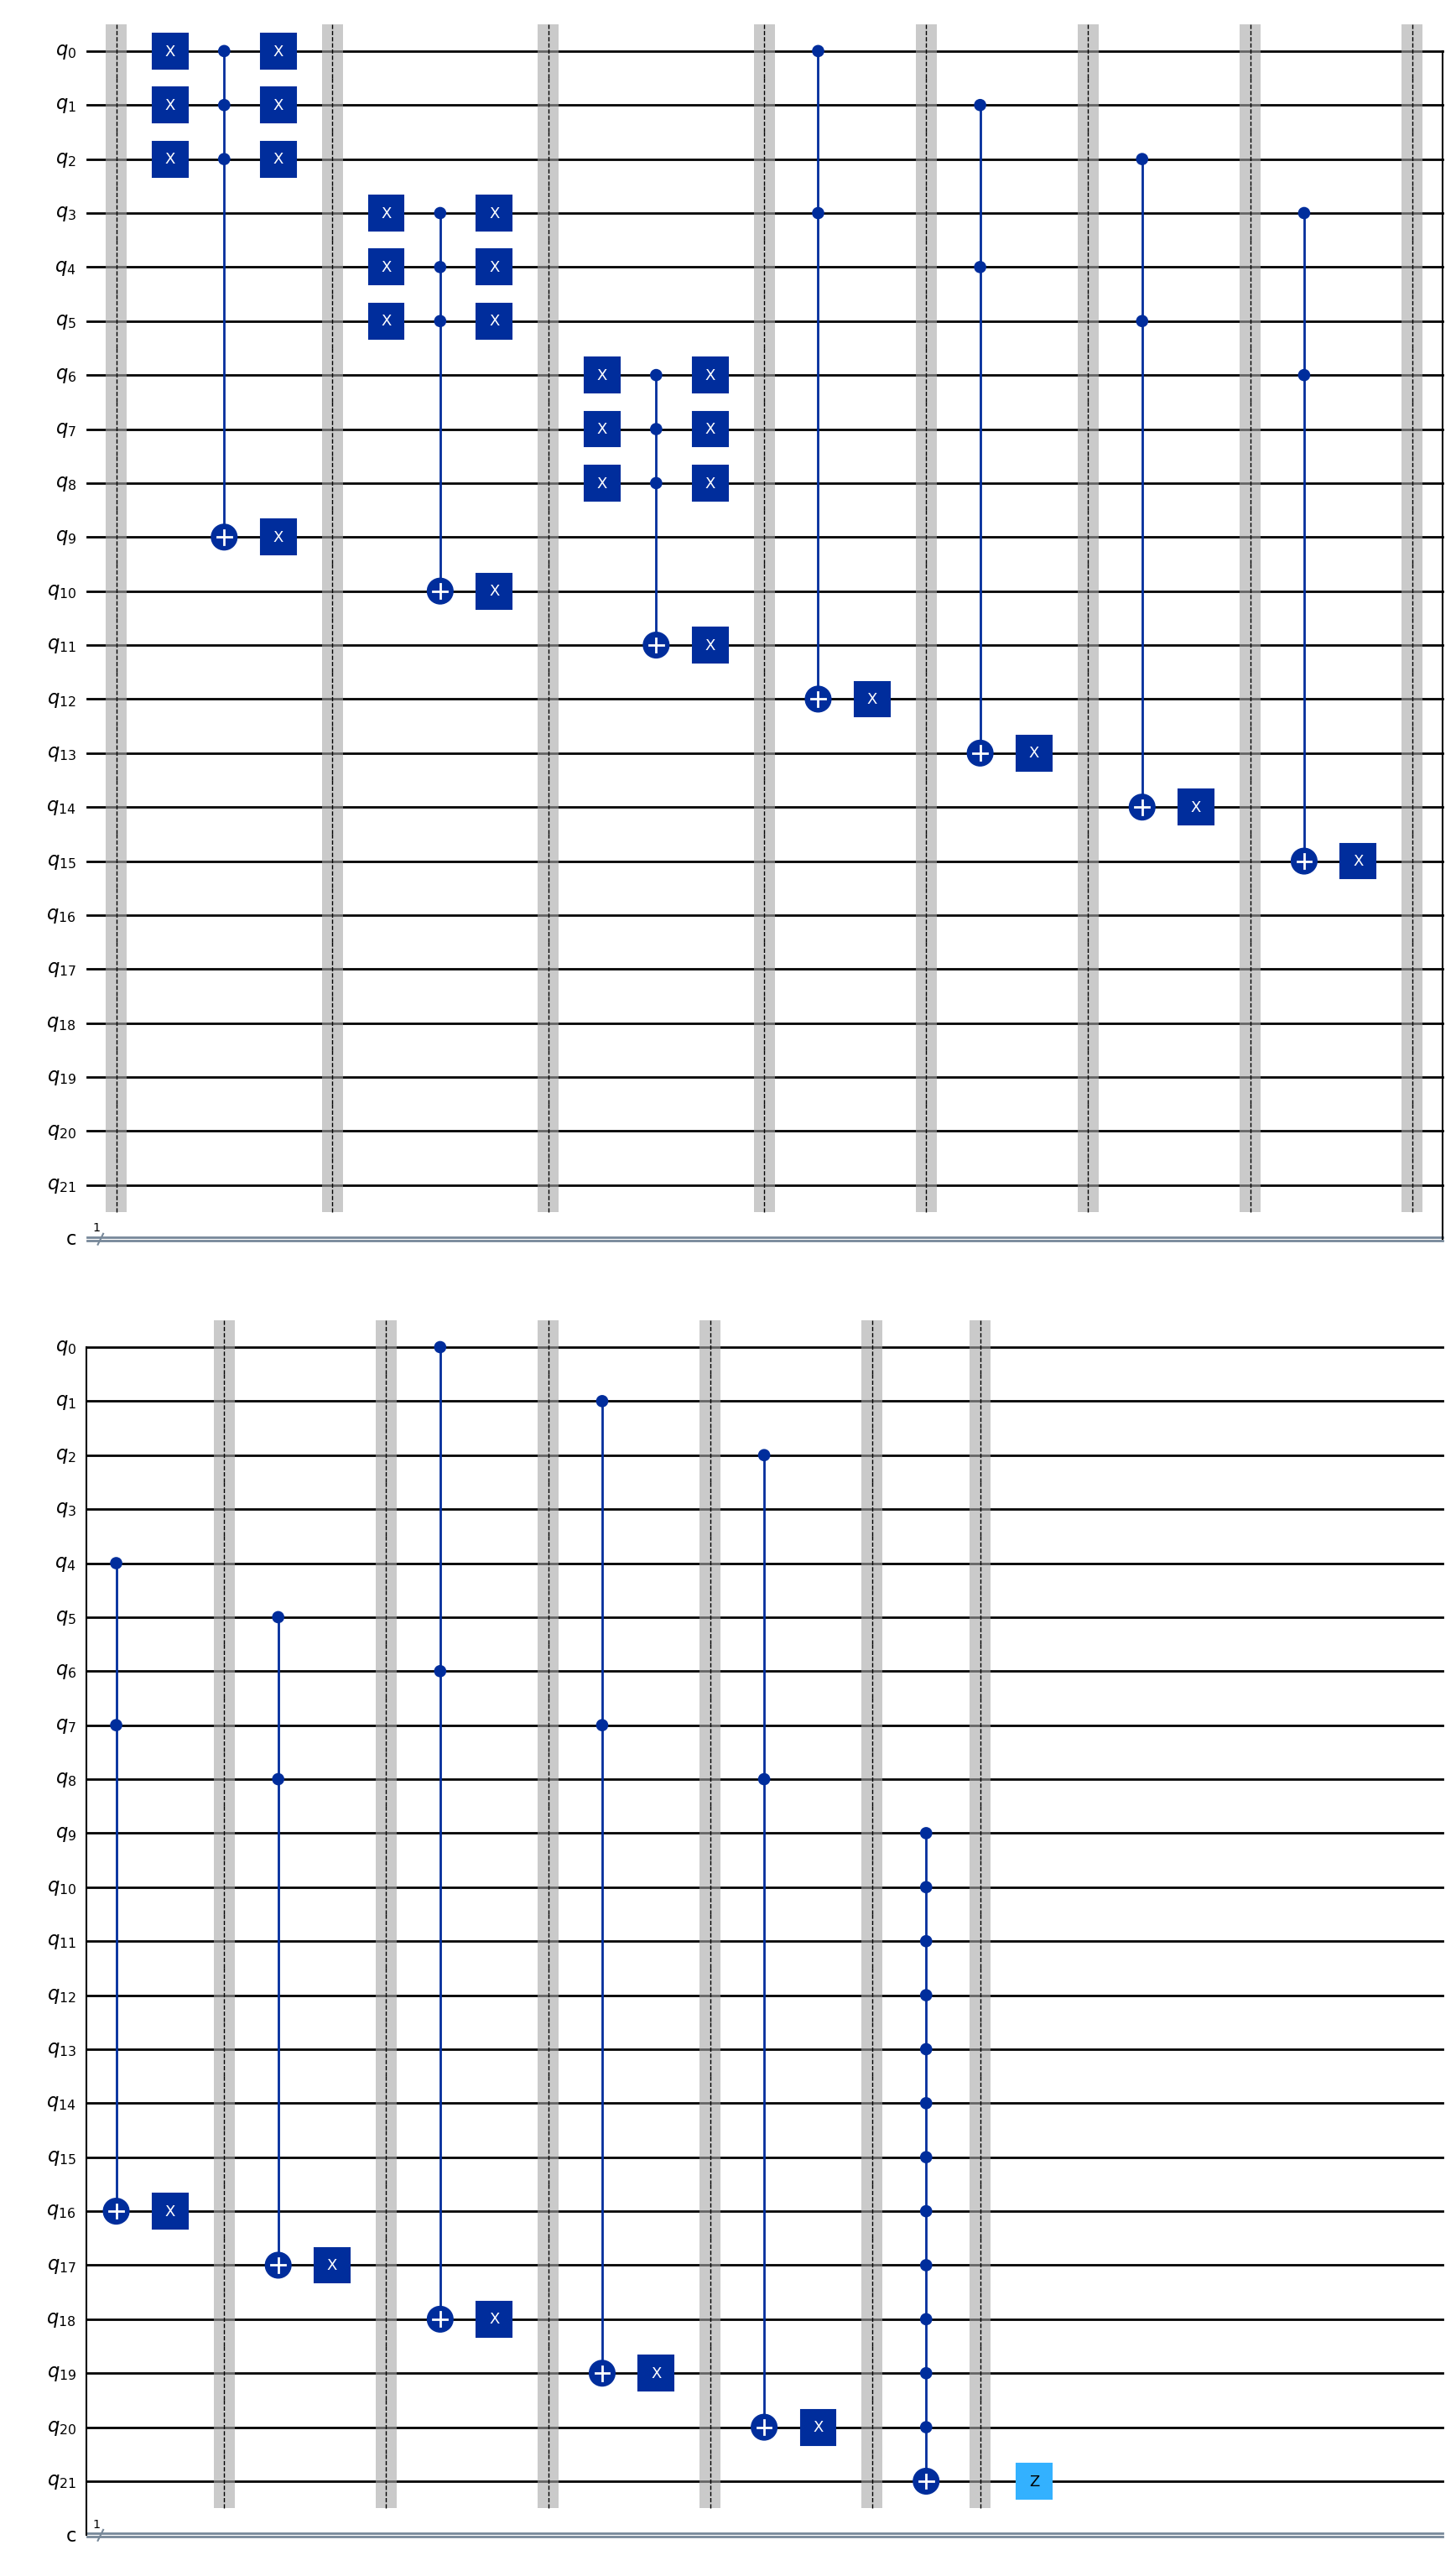

In [ ]:
# User variables
nodes = 3
edges = [(0, 1), (1, 2), (2,0)]
colors = 3

# Create the oracle
oracle = oracle_creator(nodes, edges, colors, use_extendedEdges=False)
oracle.draw(output='mpl')


Now we will define a possible solution

color_assignment is a posible solution. Qubit 0 is colored with color 0 and qubit 1 is colored with color 1

With chek_solution we can add this solution to our circuit

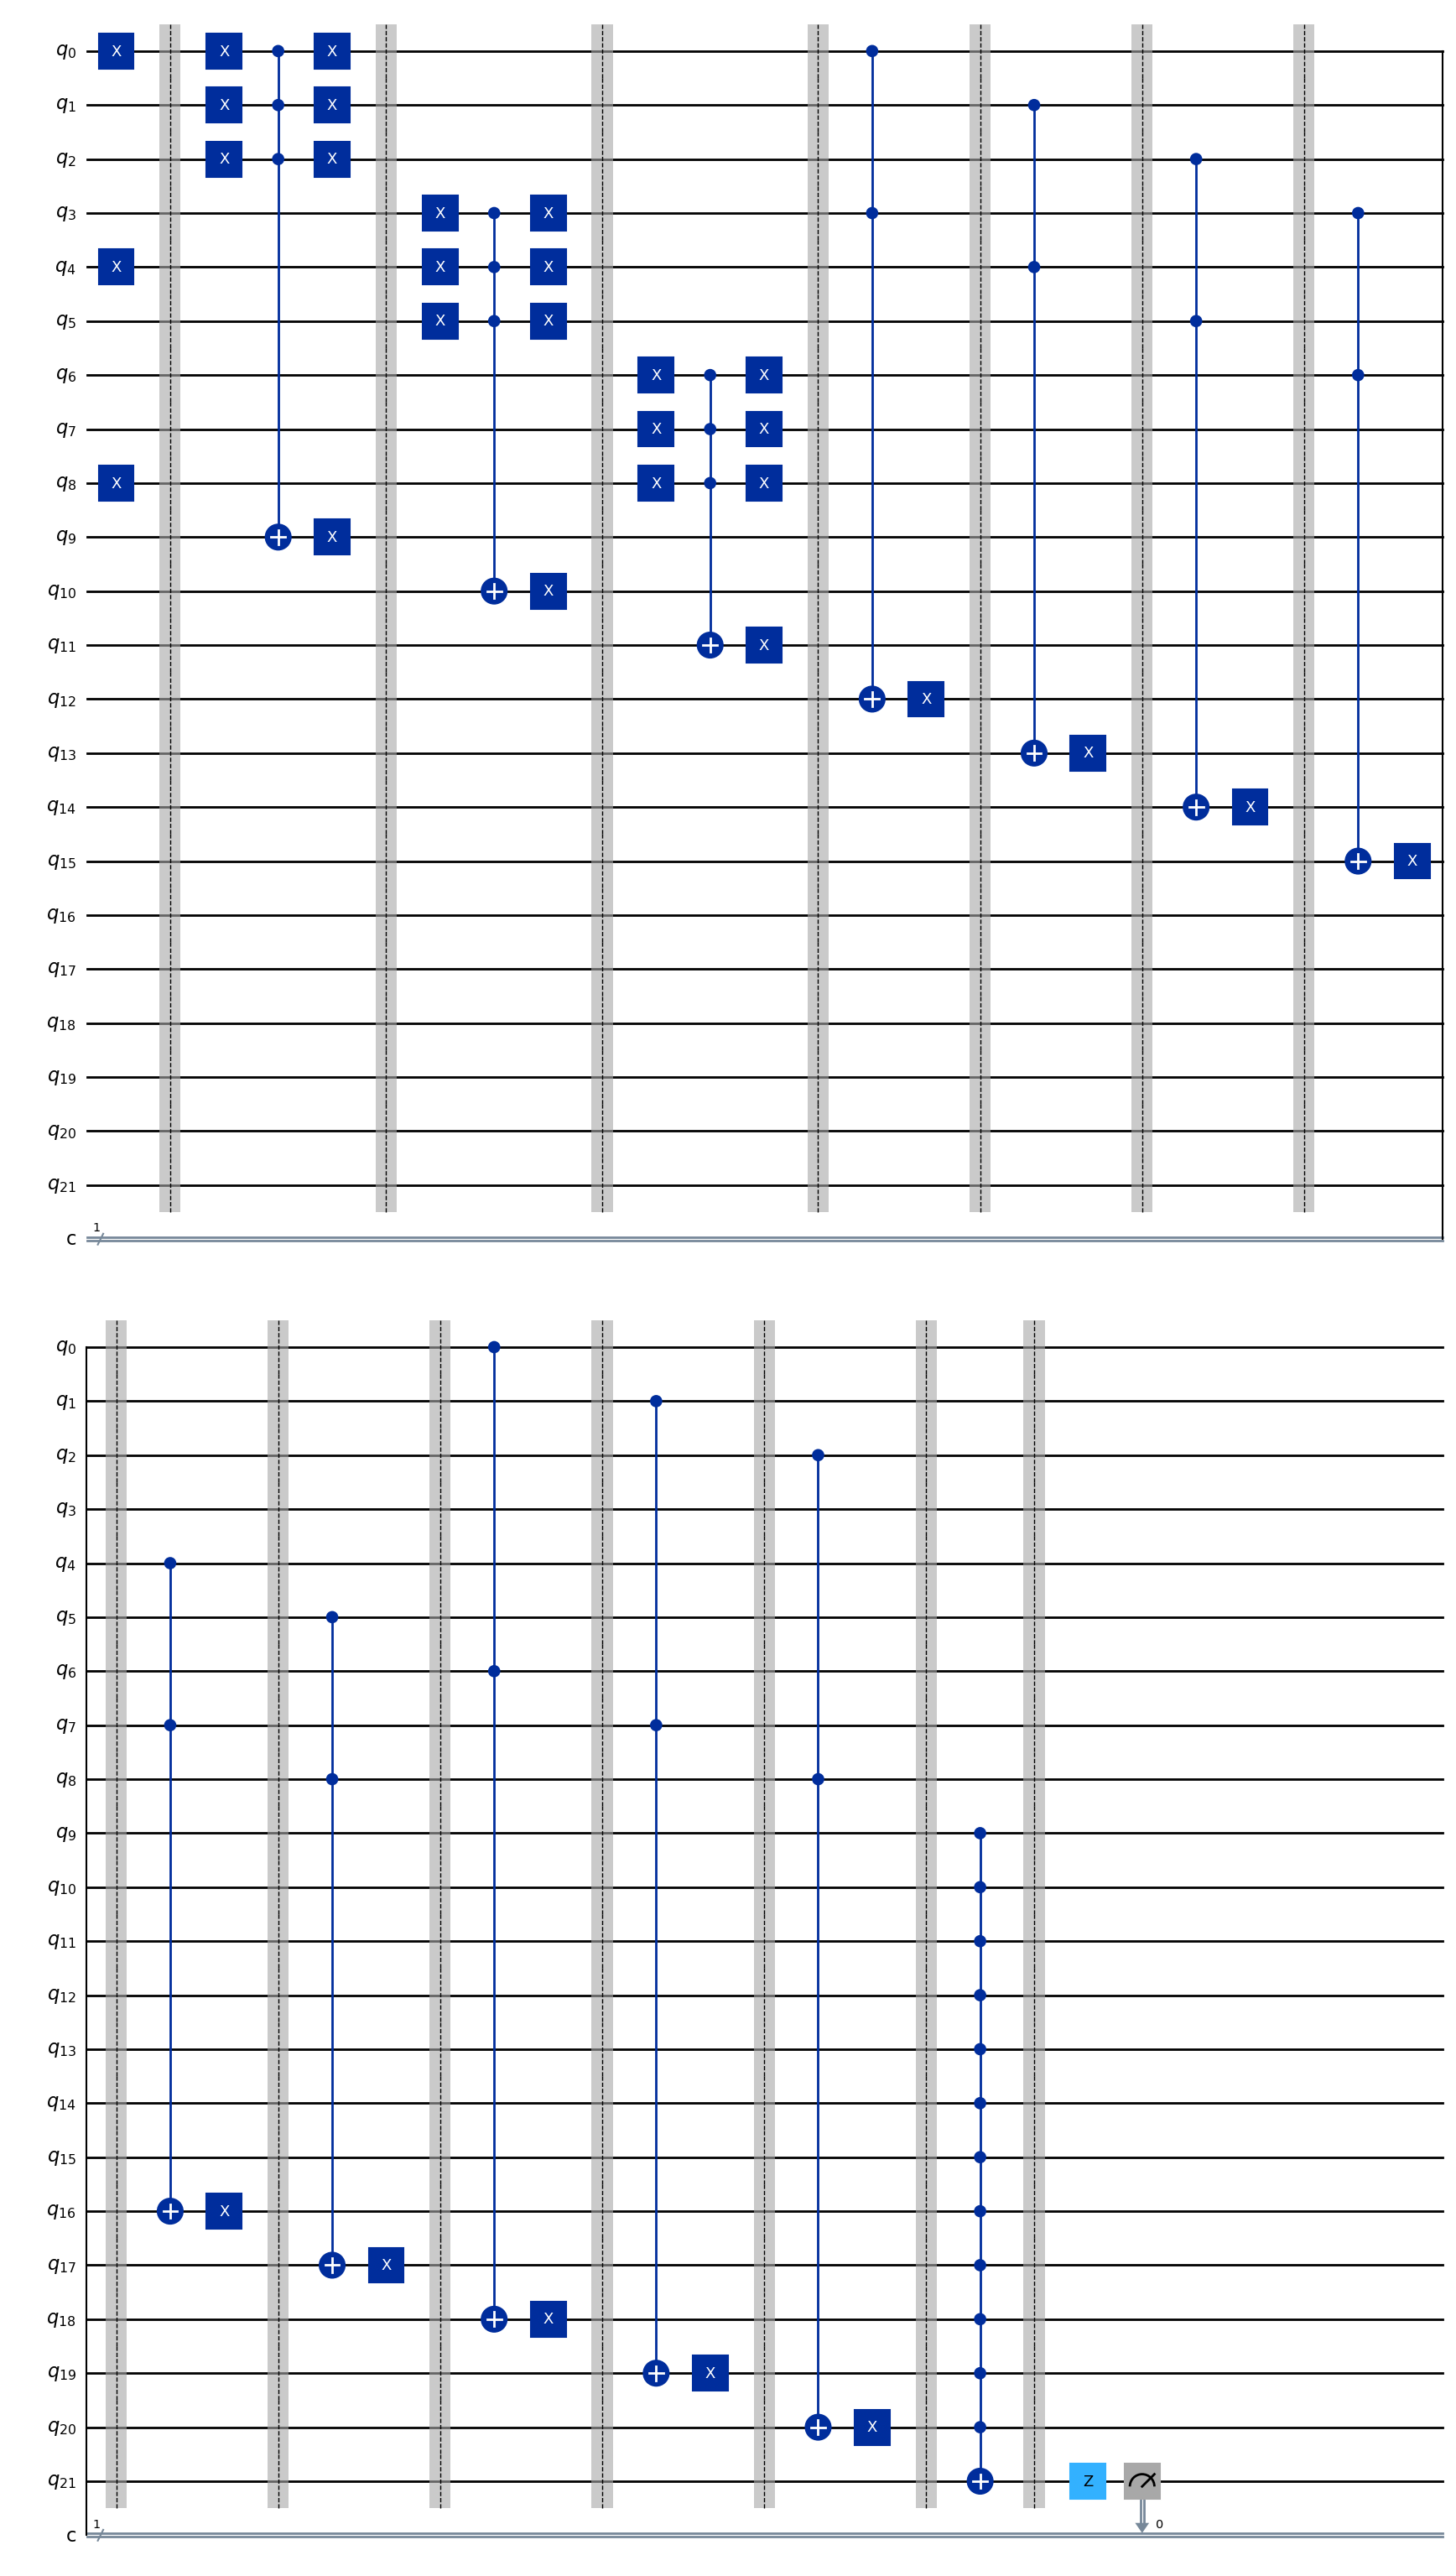

In [6]:
color_assignment = [0, 1, 2] 
circuit = check_solution(colors, color_assignment, oracle)
circuit.draw(output='mpl')

Finally we will simulate the circuit to see if the solution is correct

c:\Users\matto\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\providers\fake_provider\generic_backend_v2.py:963: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


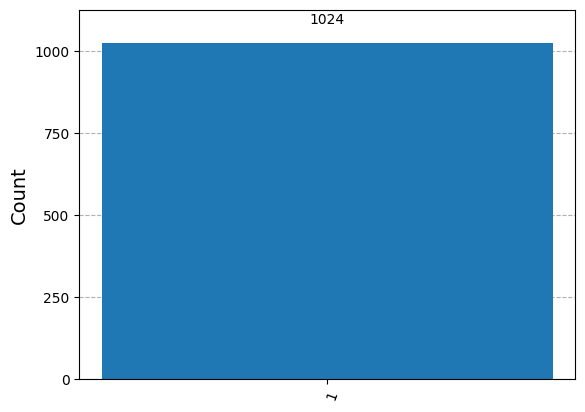

In [7]:
simulator_backend = GenericBackendV2(nodes * colors + nodes + len(edges) * colors + 1)
circuit = transpile(circuit, backend=simulator_backend)
job = simulator_backend.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)